In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd
import sklearn as sk
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, auc
# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

In [3]:
df = pd.read_excel('Student-Employability-Datasets.xlsx')
df.columns

Index(['Name of Student', 'GENERAL APPEARANCE', 'MANNER OF SPEAKING',
       'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE',
       'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS',
       'Student Performance Rating', 'CLASS'],
      dtype='object')

In [4]:
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable
2978,Student 2997,3,4,4,4,4,4,4,5,Employable
2979,Student 2998,4,5,4,5,4,4,4,5,Employable
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable


In [6]:
mapping_dict = {'Employable': 0,
                'LessEmployable': 1}
df['class'] = df['CLASS'].map(mapping_dict)

In [7]:
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,class
0,Student 1,4,5,4,5,5,5,5,5,Employable,0
1,Student 2,4,4,4,4,4,4,3,5,Employable,0
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable,1
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable,1
4,Student 5,4,4,3,3,4,4,3,5,Employable,0
...,...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable,0
2978,Student 2997,3,4,4,4,4,4,4,5,Employable,0
2979,Student 2998,4,5,4,5,4,4,4,5,Employable,0
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable,1


In [8]:
df = df.drop('CLASS',axis=1)

In [9]:
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,class
0,Student 1,4,5,4,5,5,5,5,5,0
1,Student 2,4,4,4,4,4,4,3,5,0
2,Student 3,4,3,3,3,3,3,2,5,1
3,Student 4,3,3,3,2,3,3,3,5,1
4,Student 5,4,4,3,3,4,4,3,5,0
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,0
2978,Student 2997,3,4,4,4,4,4,4,5,0
2979,Student 2998,4,5,4,5,4,4,4,5,0
2980,Student 2999,4,4,4,3,4,4,3,5,1


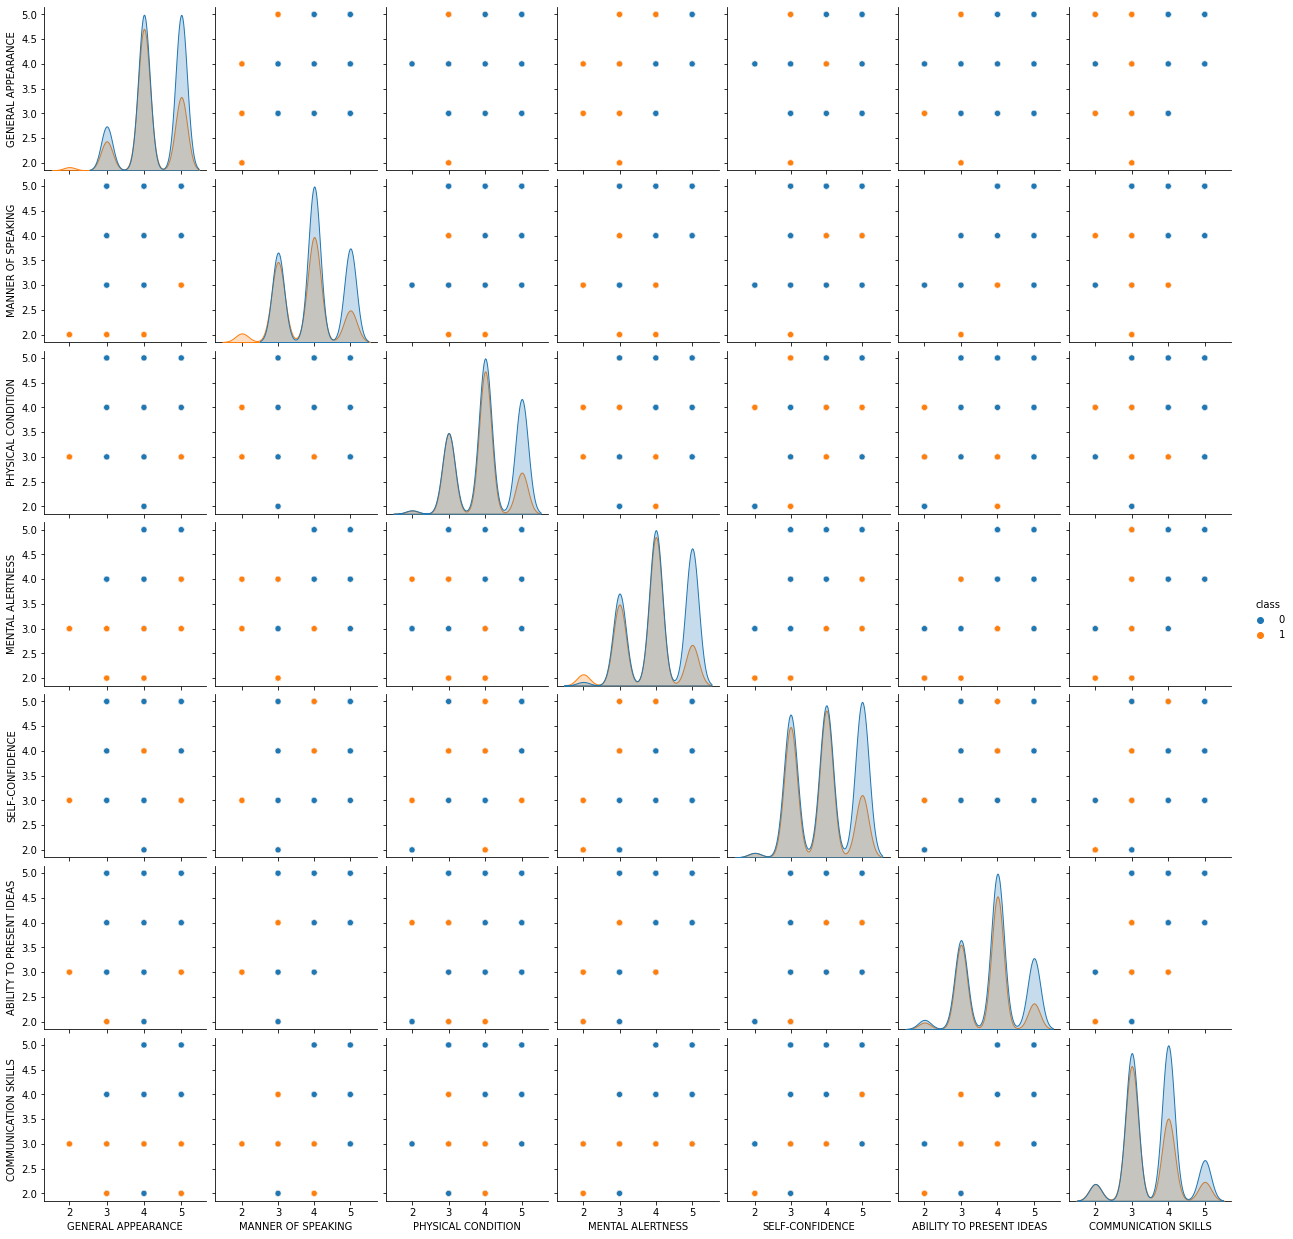

In [10]:
#I looked at different pair-plots
sns.pairplot(df, vars=df.columns[1:8], hue='class');

In [14]:
X = df.iloc[:,1:9]

In [15]:
y=df['class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state = 0)
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
y_pred = Decision_Tree.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_decision_tree = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.900804289544236

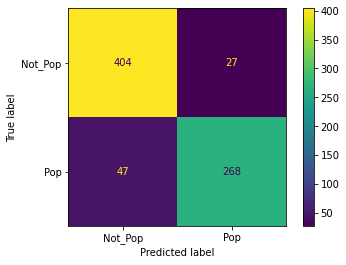

In [22]:
target_names=['Not_Pop','Pop']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=target_names)
disp.plot();

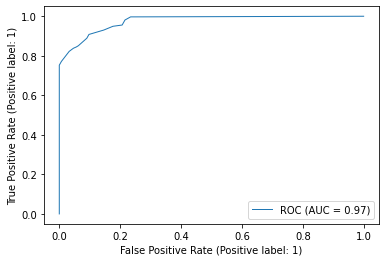

In [23]:
RocCurveDisplay.from_estimator(Decision_Tree,X_test,y_test,name='ROC',lw=1);

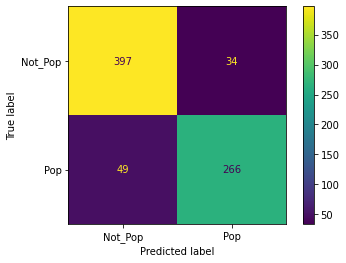

In [24]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 4
knn_model = KNeighborsClassifier(n_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
target_names=['Not_Pop','Pop']
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=target_names)
disp.plot();

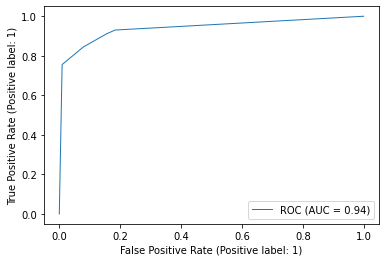

In [25]:
RocCurveDisplay.from_estimator(knn_model,X_test,y_test,name='ROC',lw=1);

In [26]:
from sklearn.svm import SVC # "Support vector classifier"
SVC_model = SVC(kernel='rbf', C=5e1)
SVC_model.fit(X_train, y_train);

In [27]:
y_pred = SVC_model.predict(X_test)
SVC_cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9021447721179625

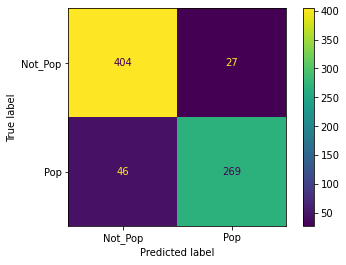

In [28]:
target_names=['Not_Pop','Pop']
disp = ConfusionMatrixDisplay(confusion_matrix=SVC_cm, display_labels=target_names)
disp.plot();

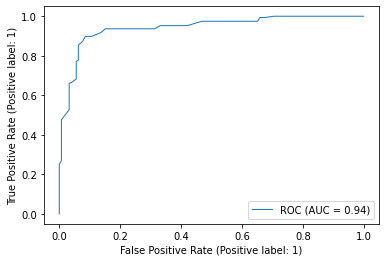

In [29]:
RocCurveDisplay.from_estimator(SVC_model,X_test,y_test,name='ROC',lw=1);

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=8, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [31]:
RF_cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8967828418230563

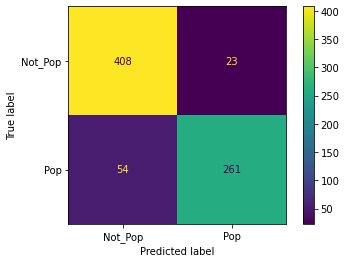

In [32]:
target_names=['Not_Pop','Pop']
disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm, display_labels=target_names)
disp.plot();

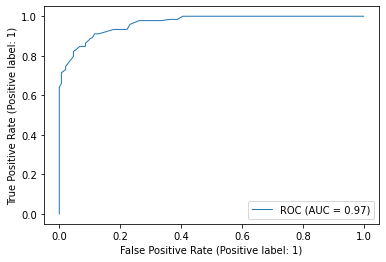

In [33]:
RocCurveDisplay.from_estimator(rf,X_test,y_test,name='ROC',lw=1);